### **Classify Iris Flowers Using a Decision Tree Classifier**

Your task is to build a **Decision Tree Classifier** to classify iris flowers into their respective species based on their physical characteristics.

#### Dataset Overview:
The Iris dataset is a classic and widely used dataset for machine learning classification problems. It contains measurements for **150 iris flowers**, with the following attributes:
- **Sepal Length (cm)**
- **Sepal Width (cm)**
- **Petal Length (cm)**
- **Petal Width (cm)**

The target variable is the **species** of the iris flower, which falls into one of three categories:
1. **Setosa**
2. **Versicolor**
3. **Virginica**

#### Steps to Follow:
1. **Data Loading and Exploration**  
   - Load the Iris dataset using a library like `sklearn.datasets`, or download it as a CSV file if preferred.
   - Explore the dataset: Visualize distributions of features and relationships using scatter plots or pair plots. Check for missing values and understand the data structure.

2. **Data Preparation**  
   - Split the dataset into **training** and **test sets** (e.g., 80% training, 20% testing) using `train_test_split` from `sklearn.model_selection`.
   - Scale the features if necessary (though decision trees don’t require scaling).

3. **Model Building**  
   - Use `DecisionTreeClassifier` from `sklearn.tree` to create the model.
   - Train the model on the training dataset and set parameters like `max_depth`, `criterion`, or `random_state` as needed.

4. **Model Evaluation**  
   - Evaluate the performance of the classifier on the test set using metrics like:
     - **Accuracy Score**
     - **Confusion Matrix**
     - **Classification Report**
   - Visualize the Decision Tree using `plot_tree` or `export_graphviz`.

5. **Feature Importance Analysis**  
   - Examine which features contributed most to the model's decisions.

6. **Model Interpretation**  
   - Interpret the decision tree's structure to understand how it classifies the iris species.

#### Bonus Challenge (Optional):
- **Hyperparameter Tuning**: Use `GridSearchCV` to find the best parameters for the Decision Tree.
- **Visualization**: Create plots that demonstrate the decision boundaries for the classification problem.
- **Comparison**: Compare the performance of the Decision Tree Classifier with other algorithms, such as Logistic Regression or Random Forest.

#### Deliverables:
- A well-documented Python script or Jupyter Notebook containing:
  - Code for loading, exploring, and preparing the data.
  - Implementation of the decision tree classifier.
  - Visualizations of the data and decision tree.
  - Performance metrics and insights.
- A brief report or conclusion summarizing the results and findings.


In [26]:
import pandas as pd

df = pd.read_csv('data/iris.csv')
df.drop('Id', axis=1, inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


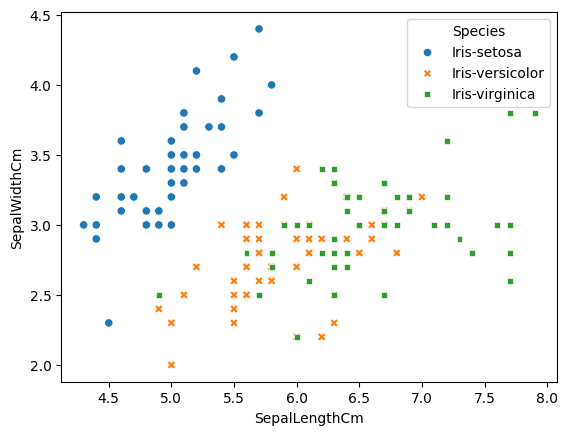

In [27]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.scatterplot(data=df, x='SepalLengthCm', y = 'SepalWidthCm', hue='Species', style='Species')
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

X = df.drop('Species', axis=1).to_numpy()
y = df['Species'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

le = LabelEncoder()

x_prep = Pipeline([
    ('min_max_scaler', MinMaxScaler())
])

le.fit(y_train)
x_prep.fit(X_train)

Pipeline(steps=[('min_max_scaler', MinMaxScaler())])

In [33]:
X_train = x_prep.transform(X_train)
y_train = le.transform(y_train)

In [34]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
clf.score(X_train, y_train)

1.0

In [36]:
X_test = x_prep.transform(X_test)
y_test = le.transform(y_test)

In [37]:
clf.score(X_test, y_test)

0.9

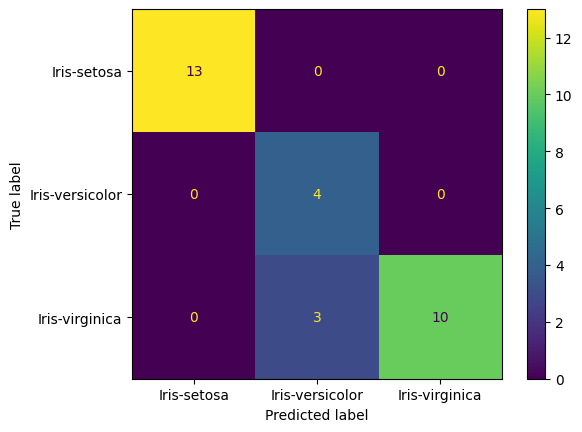

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.inverse_transform(clf.classes_))
disp.plot()
plt.show()

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.57      1.00      0.73         4
           2       1.00      0.77      0.87        13

    accuracy                           0.90        30
   macro avg       0.86      0.92      0.87        30
weighted avg       0.94      0.90      0.91        30

